# seaborn使用摘要

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 前言

一张直观的图表应该考虑的元素

- 图表的类型, 应该是使用柱状图还是折线图
- 各类线条, 字体的颜色, 大小, 位置(相对位置, 空间留白等)
- 图表的基本信息标注
- 合理的组合图

绘制图表使用代码的方式, 有很多不友好的地方, 代码更多时候是属性导向的(需要记忆, 查询大量的文档注释), 大量的细节的实现没有类似于excel为代表的传统方式来的容易(特别是需要在图表中加入大量注释性的内容).

这种繁琐, 导致的问题非常易见

[![ppdkO5d.png](https://s1.ax1x.com/2023/03/22/ppdkO5d.png)](https://imgse.com/i/ppdkO5d)

[![ppdkLUH.png](https://s1.ax1x.com/2023/03/22/ppdkLUH.png)](https://imgse.com/i/ppdkLUH)

(*图, altair的官方文档的示例, 示例代码使用了废弃的feature*)

这种问题在vba的录制宏以及微软的参考文档上也能遇到.

(文档的完善和友好以及使用的用户群, 对于挑选可视化库也是重要的考量)

这就需要考虑在选择数据可视化库时, 需要实现什么层级的图表, 需要实现什么效果...

殊途同归, 求同存异, 对症下药.

在使用数据可视化库时因该有一个认知, 图表不会因为使用代码绘制, 亦或者各种BI, 数据分析软件绘制就变得不一样, 其基本面是一样, 差异在于制图者注入的信息的不同.

在excel上实现代码绘制图表更为容易, 直接通过录制宏的方式获得代码, 修改使之满足特定条件的绘制, 对于不需要考虑更复杂的需求, 例如, 更大的数据集, 数据的大规模分享等.

切不可, 削足适履, 为了实现而实现.

## matplotlib

![detail](https://pic1.zhimg.com/80/v2-342ae4bbd5969409d946887fbda5c1bc_720w.webp)

### 基本元素

*暂时仅讨论静态的图表, 交互类的暂不做讨论*

[![ppa4fEj.png](https://s1.ax1x.com/2023/03/22/ppa4fEj.png)](https://imgse.com/i/ppa4fEj)

以excel图表为例更为直观.

**关键对象**

- figure, 图, 画布, 作图的容器
  matplotlib.figure模块包含Figure类。它是所有plot元素的顶级容器。通过从pyplot模块调用figure()函数来实例化Figure对象 -
- axes, 画布中实际的绘制图的地方
  Axes对象是具有数据空间的图像区域。给定的图形可以包含许多轴，但给定的Axes对象只能在一个图中。轴包含两个(或在3D情况下为三个)Axis对象。Axes类及其成员函数是使用OO接口的主要入口点。
  通过调用add_axes()方法将Axes对象添加到图中。它返回轴对象并在位置rect [left，bottom，width，height]添加一个轴，其中所有数量都是图形宽度和高度的分数。
- axis, 轴
- subplot, 子图

整体的设置

**其他对象**

- label, 标签
- title, 标题
- tick, 刻度
- grid, 网格(背景)
- line, 线条
- legend, 图例
- marker, 数据点

细节的设置

**注**: 一个绘图, 只有一个figure, 一个figure可以有多个subplot

可以简单来看看, 在绘制中会遇到什么需求, 什么问题.

- 各种标签的标注
- 字体大小, 位置的设置(例如轴标签中存在较长的文本, 显示效果很差, 需要调整标签文本的位置, 需要调小字体)
- 轴数据范围
- 刻度的大小
- 不同的线条, 文本的颜色调整
- 图例的位置(图例的内容)
- 组合图
- 拟合曲线
- 整体的背景/风格


### 速查表

[速查表来源_cheatsheets](https://github.com/matplotlib/cheatsheets)

[![ppaID6f.png](https://s1.ax1x.com/2023/03/22/ppaID6f.png)](https://imgse.com/i/ppaID6f)

[![ppaI8OO.png](https://s1.ax1x.com/2023/03/22/ppaI8OO.png)](https://imgse.com/i/ppaI8OO)

[![ppaI36K.png](https://s1.ax1x.com/2023/03/22/ppaI36K.png)](https://imgse.com/i/ppaI36K)

[![ppaI0pt.png](https://s1.ax1x.com/2023/03/22/ppaI0pt.png)](https://imgse.com/i/ppaI0pt)

[![ppaIB1P.png](https://s1.ax1x.com/2023/03/22/ppaIB1P.png)](https://imgse.com/i/ppaIB1P)

### 小结

在`数据可视化库巡览`一文, 提及, 并不建议在生产环境使用`matplotlib`, 但是为什么花这么长的篇幅谈matplotlib?

因为这些是最基础性的东西, 通过对matplotlib的拆解来了解数据可视化的基础元素, 这些基础在其他的可视化库上的实现是类似的, 只是方式上的差异.

另外, matplotlib提供了精确到点的调整能力, 这对于需要实现类似于手工操作excel图表大量繁琐细微的操作而言, matplotlib显然是比其他的可视化库更有优势.

> 即得其利, 亦得其弊

`matplotlib`的繁琐操作, 显然在实际生产环境不适合的.

例如 matplotlib的数据接收方式, 显然是很难接受的方式, 因为多数情况, 是不希望将数据拆解开来使用.

## seaborn

[seaborn: statistical data visualization](https://seaborn.pydata.org/)


> Seaborn is a Python data visualization library **based on matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.

预置数据集

```python

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 图表分类

在绘制图表时, 需要考虑, 通过图表需要表达什么. 是希望看到整体的数据还是局部分异常数据, 亦或者是探索数据间的关联性, 还是试图对数据进行分类等等.

![img_type](https://seaborn.pydata.org/_images/function_overview_8_0.png)

<iframe width=600 height=600 src="https://seaborn.pydata.org/examples/index.html"></iframe>

![type](https://pic4.zhimg.com/v2-ea01341996df25bbf5ee66f957dc949f_r.jpg)

[图源](https://zhuanlan.zhihu.com/p/441308674)

[![ppaoNuT.png](https://s1.ax1x.com/2023/03/22/ppaoNuT.png)](https://imgse.com/i/ppaoNuT)

## 一些基础参数

| marker                 | symbol                                                | description                                                  |
| ---------------------- | ----------------------------------------------------- | ------------------------------------------------------------ |
| `"."`                  | ![m00](https://matplotlib.org/stable/_images/m00.png) | point                                                        |
| `","`                  | ![m01](https://matplotlib.org/stable/_images/m01.png) | pixel                                                        |
| `"o"`                  | ![m02](https://matplotlib.org/stable/_images/m02.png) | circle                                                       |
| `"v"`                  | ![m03](https://matplotlib.org/stable/_images/m03.png) | triangle_down                                                |
| `"^"`                  | ![m04](https://matplotlib.org/stable/_images/m04.png) | triangle_up                                                  |
| `"<"`                  | ![m05](https://matplotlib.org/stable/_images/m05.png) | triangle_left                                                |
| `">"`                  | ![m06](https://matplotlib.org/stable/_images/m06.png) | triangle_right                                               |
| `"1"`                  | ![m07](https://matplotlib.org/stable/_images/m07.png) | tri_down                                                     |
| `"2"`                  | ![m08](https://matplotlib.org/stable/_images/m08.png) | tri_up                                                       |
| `"3"`                  | ![m09](https://matplotlib.org/stable/_images/m09.png) | tri_left                                                     |
| `"4"`                  | ![m10](https://matplotlib.org/stable/_images/m10.png) | tri_right                                                    |
| `"8"`                  | ![m11](https://matplotlib.org/stable/_images/m11.png) | octagon                                                      |
| `"s"`                  | ![m12](https://matplotlib.org/stable/_images/m12.png) | square                                                       |
| `"p"`                  | ![m13](https://matplotlib.org/stable/_images/m13.png) | pentagon                                                     |
| `"P"`                  | ![m23](https://matplotlib.org/stable/_images/m23.png) | plus (filled)                                                |
| `"*"`                  | ![m14](https://matplotlib.org/stable/_images/m14.png) | star                                                         |
| `"h"`                  | ![m15](https://matplotlib.org/stable/_images/m15.png) | hexagon1                                                     |
| `"H"`                  | ![m16](https://matplotlib.org/stable/_images/m16.png) | hexagon2                                                     |
| `"+"`                  | ![m17](https://matplotlib.org/stable/_images/m17.png) | plus                                                         |
| `"x"`                  | ![m18](https://matplotlib.org/stable/_images/m18.png) | x                                                            |
| `"X"`                  | ![m24](https://matplotlib.org/stable/_images/m24.png) | x (filled)                                                   |
| `"D"`                  | ![m19](https://matplotlib.org/stable/_images/m19.png) | diamond                                                      |
| `"d"`                  | ![m20](https://matplotlib.org/stable/_images/m20.png) | thin_diamond                                                 |
| `"|"`                  | ![m21](https://matplotlib.org/stable/_images/m21.png) | vline                                                        |
| `"_"`                  | ![m22](https://matplotlib.org/stable/_images/m22.png) | hline                                                        |
| `0` (`TICKLEFT`)       | ![m25](https://matplotlib.org/stable/_images/m25.png) | tickleft                                                     |
| `1` (`TICKRIGHT`)      | ![m26](https://matplotlib.org/stable/_images/m26.png) | tickright                                                    |
| `2` (`TICKUP`)         | ![m27](https://matplotlib.org/stable/_images/m27.png) | tickup                                                       |
| `3` (`TICKDOWN`)       | ![m28](https://matplotlib.org/stable/_images/m28.png) | tickdown                                                     |
| `4` (`CARETLEFT`)      | ![m29](https://matplotlib.org/stable/_images/m29.png) | caretleft                                                    |
| `5` (`CARETRIGHT`)     | ![m30](https://matplotlib.org/stable/_images/m30.png) | caretright                                                   |
| `6` (`CARETUP`)        | ![m31](https://matplotlib.org/stable/_images/m31.png) | caretup                                                      |
| `7` (`CARETDOWN`)      | ![m32](https://matplotlib.org/stable/_images/m32.png) | caretdown                                                    |
| `8` (`CARETLEFTBASE`)  | ![m33](https://matplotlib.org/stable/_images/m33.png) | caretleft (centered at base)                                 |
| `9` (`CARETRIGHTBASE`) | ![m34](https://matplotlib.org/stable/_images/m34.png) | caretright (centered at base)                                |
| `10` (`CARETUPBASE`)   | ![m35](https://matplotlib.org/stable/_images/m35.png) | caretup (centered at base)                                   |
| `11` (`CARETDOWNBASE`) | ![m36](https://matplotlib.org/stable/_images/m36.png) | caretdown (centered at base)                                 |
| `"none"` or `"None"`   |                                                       | nothing                                                      |
| `" "` or `""`          |                                                       | nothing                                                      |
| `'$...$'`              | ![m37](https://matplotlib.org/stable/_images/m37.png) | Render the string using mathtext. E.g `"$f$"` for marker showing the letter `f`. |
| `verts`                |                                                       | A list of (x, y) pairs used for Path vertices. The center of the marker is located at (0, 0) and the size is normalized, such that the created path is encapsulated inside the unit cell. |

图例出现的位置

0: best

1: upper right

2: upper left

3: lower left

4: lower right

5: right

6: center left

7: center right

8: lower center

9: upper center

10: center

### 基础图

[![ppajlUf.png](https://s1.ax1x.com/2023/03/22/ppajlUf.png)](https://imgse.com/i/ppajlUf)

excel中支持的图表类型

#### 柱状图

```python
seaborn.barplot(
    data=None,
    *,
    x=None, 
    y=None, 
    hue=None,
    order=None, 
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ci='deprecated',
    ax=None,
    **kwargs
)
```

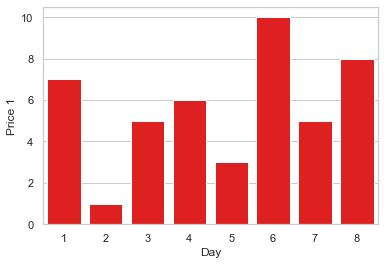

In [38]:
# 柱状图
df = pd.DataFrame({"Price 1": [7,1,5,6,3,10,5,8],
                    "Price 2" : [1,2,8,4,3,9,5,2],
                    "Day": [1,2,3,4,5,6,7,8]})

s1 = sns.barplot(x = 'Day', y = 'Price 1', data = df, color = 'red')

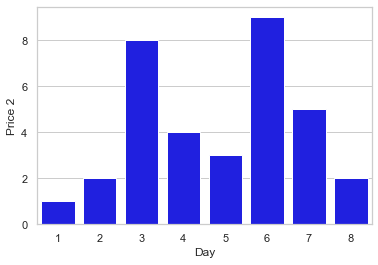

In [39]:
s2 = sns.barplot(x = 'Day', y = 'Price 2', data = df, color = 'blue')

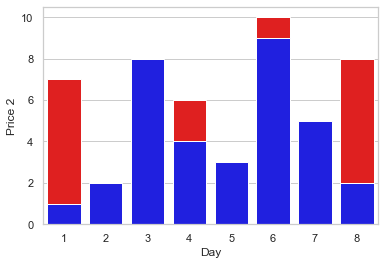

In [40]:
s1 = sns.barplot(x = 'Day', y = 'Price 1', data = df, color = 'red')
s2 = sns.barplot(x = 'Day', y = 'Price 2', data = df, color = 'blue')

### 散点图

```python
seaborn.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs
)
```

In [2]:
# 模拟数据
df = pd.DataFrame({'a': np.random.randint(1, 100, size=10), 'b': np.random.uniform(1, 1000, 10)})

In [9]:
df

,a,b
0,99,880.781462
1,34,345.190199
2,37,629.169542
3,59,546.929944
4,71,860.067450
5,38,996.522699
6,57,113.451830
7,76,758.097082
8,10,617.977605
9,31,638.351229


[Text(0.5, 1.0, 'random data')]

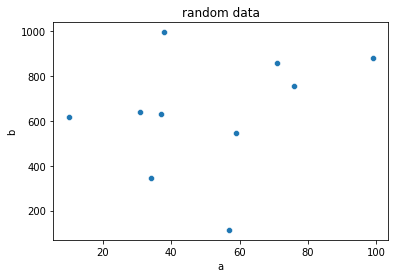

In [26]:
# 标题

sns.scatterplot(x = "a", y = "b", data=df).set(title='random data')

### 折线图

```python
seaborn.lineplot(
    data=None, 
    *, 
    x=None, 
    y=None, 
    hue=None, 
    size=None, 
    style=None, 
    units=None, 
    palette=None, 
    hue_order=None, 
    hue_norm=None, 
    sizes=None, 
    size_order=None, 
    size_norm=None, 
    dashes=True, 
    markers=None, 
    style_order=None, 
    estimator='mean', 
    errorbar=('ci', 95), 
    n_boot=1000, 
    seed=None, 
    orient='x', 
    sort=True, 
    err_style='band', 
    err_kws=None, 
    legend='auto', 
    ci='deprecated', 
    ax=None, 
    **kwargs
    )

相关参数相当晦涩, 没有图不好说明

| parameters  | 含义           | 数据类型                             | 备注                       |
| ----------- | -------------- | ------------------------------------ | -------------------------- |
| data        | 绘图的数据     | DataFrame,  array, or list of arrays |                            |
| x           |                | dataframe上的列名称, 或者数据        |                            |
| y           |                | dataframe上的列名称, 或者数据        |                            |
| hue         | 线条颜色相关   | list                                 |                            |
| size        | 线条的宽度相关 | list,  dict, or tuple                |                            |
| style       | 区分线条相关   |                                      |                            |
| units       |                |                                      |                            |
| palette     | 调色板         |                                      |                            |
| hue_order   |                |                                      |                            |
| hue_norm    |                |                                      |                            |
| sizes       |                |                                      |                            |
| size_order  |                |                                      |                            |
| size_norm   |                |                                      |                            |
| dashes      |                | boolean,  list, or dictionary        |                            |
| markers     | 数据标点的形状 |                                      |                            |
| style_order |                |                                      |                            |
| estimator   |                |                                      |                            |
| errorbar    |                |                                      |                            |
| n_boot      |                |                                      |                            |
| seed        |                |                                      |                            |
| orient      | 绘图方向       |                                      |                            |
| sort        |                |                                      |                            |
| err_style   |                |                                      |                            |
| err_kws     |                |                                      |                            |
| legend      | 图例           |                                      |                            |
| ci          | 废弃           |                                      |                            |
| ax          | 轴             | 轴                                   | 如果没有, 则画在当前的轴上 |


<Axes: >

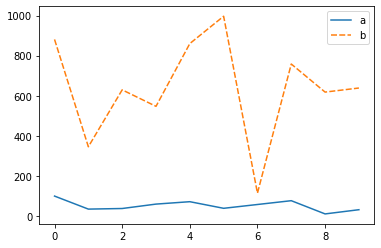

In [19]:
# 当x, y缺失时

sns.lineplot(data=df)

<Axes: xlabel='a', ylabel='b'>

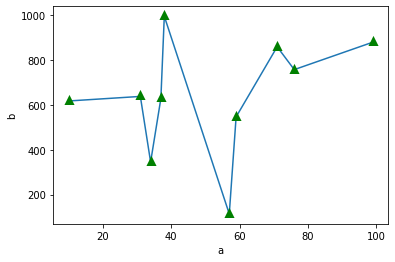

In [31]:
# 当x, y被指定时

sns.lineplot(
    data=df,  
    x='a',
    y='b',
    marker='^',
    markeredgecolor='g',
    markersize='2',
    markeredgewidth=5
)

```bash
marker='^',
markeredgecolor='g',
markersize='2',
markeredgewidth=5

maker设置相关, 形状, 大小, 颜色, 边缘

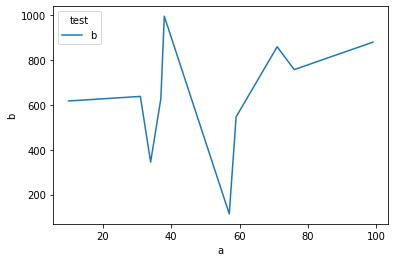

In [22]:
# 手动指定图例
sns.lineplot(data=df,  x='a', y='b')

# loc, 图例出现的位置
plt.legend(title='test', labels=['b'], loc=0)

Text(0, 0.5, 'test_b')

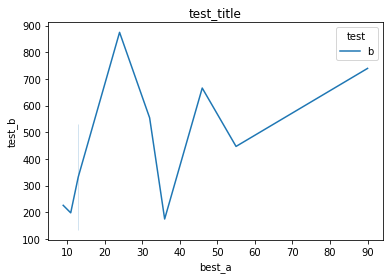

In [20]:
# 设置周围的标签
sns.lineplot(data=df,  x='a', y='b')

plt.legend(title='test', labels=['b'], loc=0)
plt.title('test_title')
plt.xlabel('best_a')
plt.ylabel('test_b')

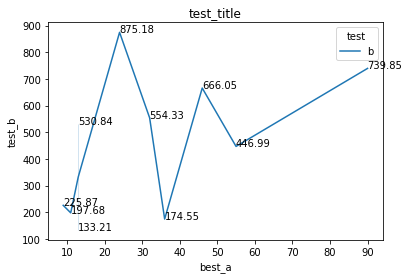

In [19]:
# 添加数据标签, 这一步比较麻烦
# 这也看到 matplotlib(seaborn) 在使用上的繁琐
# 数据标签作为高频的使用项

sns.lineplot(data=df,  x='a', y='b')

plt.legend(title='test', labels=['b'], loc=0)
plt.title('test_title')
plt.xlabel('best_a')
plt.ylabel('test_b')

for e in df.iterrows():
    plt.text(e[1]['a'], e[1]['b'], str(round(e[1]['b'], 2)))

In [33]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)

values = rs.randn(365, 4).cumsum(axis=0)

dates = pd.date_range("1 1 2016", periods=365, freq="D")

data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

# 7天的数据(均值)
data = data.rolling(7).mean()

In [34]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990


<Axes: >

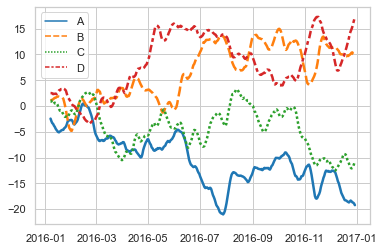

In [35]:
# 配色板 & 线宽

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<Axes: >

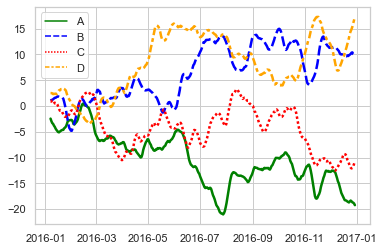

In [36]:
# 也可以手动指定颜色

sns.lineplot(data=data, palette=['green', 'blue', 'red', 'orange'], linewidth=2.5)

### 组合图


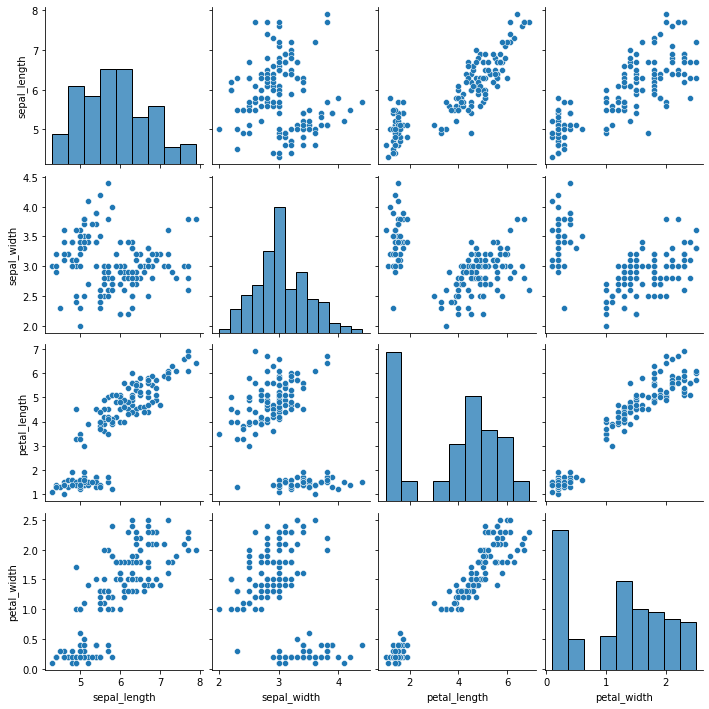

In [21]:
iris = sns.load_dataset('iris')

sns.pairplot(iris)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

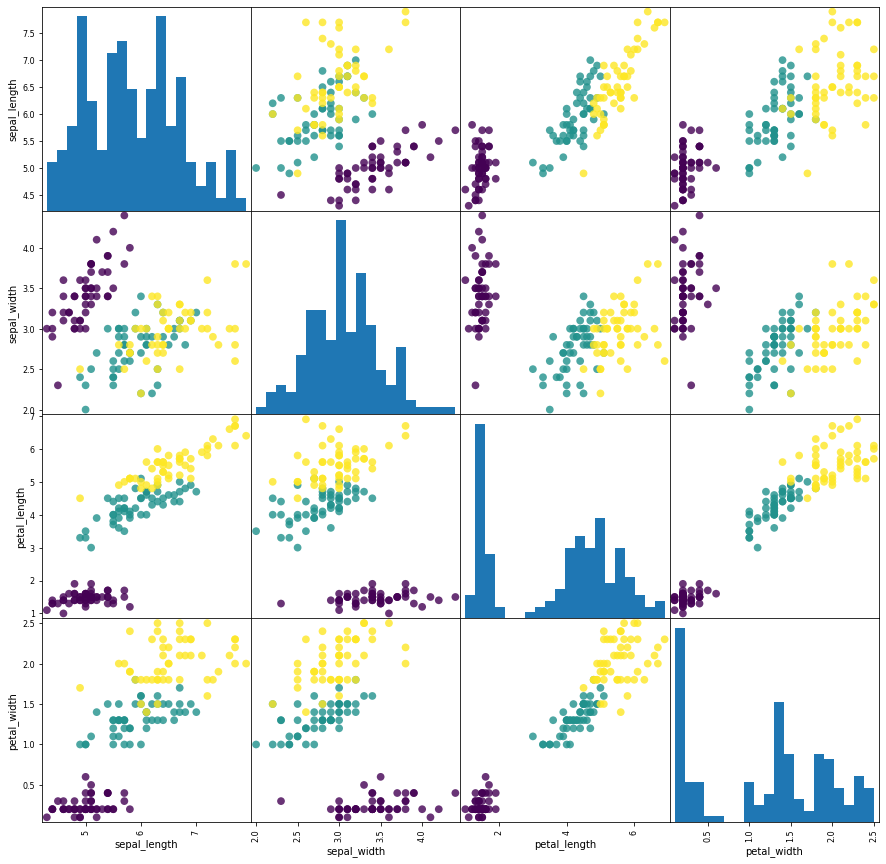

In [24]:
y =np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

pd.plotting.scatter_matrix(iris, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s= 60, alpha=.8, c=y)

In [26]:
import plotly.express as px

In [41]:
px.scatter_matrix(iris,  
    dimensions=iris.columns.values[:-1], 
    color="species"
)

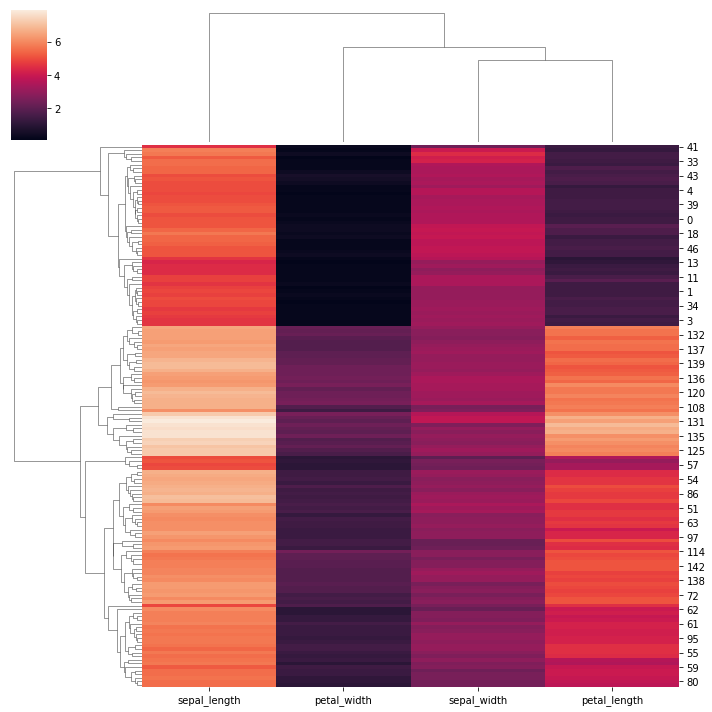

In [39]:
sns.clustermap(iris.iloc[:, 0: -1])

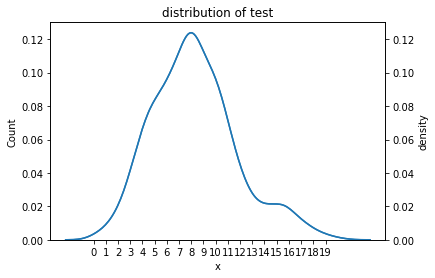

In [51]:
y = np.abs(np.random.normal(np.random.choice([5,9,15],2000,p=[3/9,5/9,1/9]),2,2000))
ax = sns.kdeplot(y)
ax.set_title('distribution of test')
ax.set(ylabel='Count',xlabel='x')

n = 20
ax.set_xticks(range(n))
ax.set_xticklabels(range(n))
ax2 = plt.twinx()
ax2 = sns.kdeplot(y,ax=ax2)
ax2.set_ylabel('density')
plt.show()

In [53]:
import plotly.graph_objects as go

In [57]:
fig = go.Figure()
 
fig.add_trace(go.Bar(x=[1, 2, 3], y=[4, 5, 6],name="yaxis1 data", yaxis='y1'))
 
fig.add_trace(go.Scatter(x=[2, 3, 5], y=[40, 50, 60], name="yaxis2 data", yaxis="y2"))
 
fig.add_trace(go.Bar(x=[4, 5, 6], y=[40000, 50000, 60000], name="yaxis3 data", yaxis="y3"))
 
fig.update_layout(
    # 区分开轴的位置
    xaxis=dict(domain=[0.3, 0.7]),
    yaxis1=dict(title="yaxis title", titlefont=dict(color="#1f77b4"), tickfont=dict(color="#1f77b4")),
    yaxis2=dict(title="yaxis2 title", overlaying="y", side="left", position=0.15),
    yaxis3=dict(title="yaxis3 title", anchor="x", overlaying="y", side="right"),
    title_text="Three y-axes test",
    width=800,
)
 
fig.show()

## 小结

各个可视化库或多或少有自己的特色, 如操作细节好, 图表实现的方式简单, 地图相关绘制的好, 无需纠结于某个库的好坏.

择优取之.

从多个角度来看, plotly更值得入手.